### Deliverable 3: Optimizing The Model

The following cells are just inherited from Deliverable 1&2 to preprocess the dataset for Optimization 1 & 2.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
non_beneficial = ["EIN", "NAME"]
application_df.drop(columns=non_beneficial, inplace=True)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

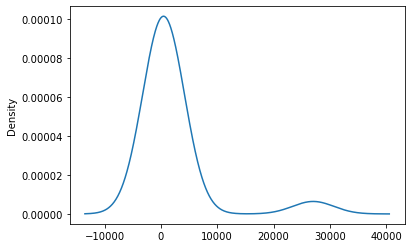

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density();

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_counts[app_type_counts < 600].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classif_counts = application_df.CLASSIFICATION.value_counts()
classif_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2561        1
C2570        1
C4500        1
C6100        1
C1248        1
Name: CLASSIFICATION, Length: 71, dtype: int64

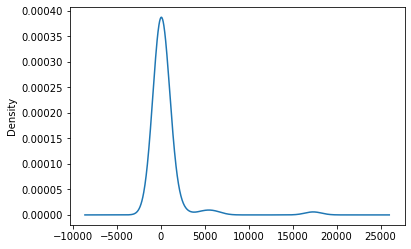

In [8]:
# Visualize the value counts of CLASSIFICATION
classif_counts.plot.density();

In [9]:
# Determine which values to replace if counts are less than ..?
replace_classif = list(classif_counts[classif_counts < 2500].index)

# Replace in dataframe
for cls in replace_classif:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Optimization Begins...
<br/><br/>

### Option 1. Extending the network and increasing the amount of epochs.

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                492       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 643us/step - loss: 0.6385 - accuracy: 0.67380s - loss: 0.6790 - ac
Epoch 2/200
804/804 [==============================] - 0s 588us/step - loss: 0.5843 - accuracy: 0.7185
Epoch 3/200
804/804 [==============================] - 1s 661us/step - loss: 0.5724 - accuracy: 0.7237
Epoch 4/200
804/804 [==============================] - 1s 703us/step - loss: 0.5670 - accuracy: 0.7243
Epoch 5/200
804/804 [==============================] - 1s 636us/step - loss: 0.5633 - accuracy: 0.7257
Epoch 6/200
804/804 [==============================] - 0s 589us/step - loss: 0.5608 - accuracy: 0.7266
Epoch 7/200
804/804 [==============================] - 0s 587us/step - loss: 0.5589 - accuracy: 0.7277
Epoch 8/200
804/804 [==============================] - 0s 582us/step - loss: 0.5582 - accuracy: 0.7285
Epoch 9/200
804/804 [==============================] - 0s 599us/step - loss: 0.5569 - accuracy: 0.7288
Epoch 10/200
804/804 [=============================

804/804 [==============================] - 0s 595us/step - loss: 0.5485 - accuracy: 0.7323
Epoch 80/200
804/804 [==============================] - 0s 606us/step - loss: 0.5489 - accuracy: 0.7318
Epoch 81/200
804/804 [==============================] - 1s 635us/step - loss: 0.5485 - accuracy: 0.7323
Epoch 82/200
804/804 [==============================] - 0s 601us/step - loss: 0.5484 - accuracy: 0.7320
Epoch 83/200
804/804 [==============================] - 0s 593us/step - loss: 0.5485 - accuracy: 0.7325
Epoch 84/200
804/804 [==============================] - 0s 601us/step - loss: 0.5486 - accuracy: 0.7324
Epoch 85/200
804/804 [==============================] - 0s 618us/step - loss: 0.5482 - accuracy: 0.7332
Epoch 86/200
804/804 [==============================] - 0s 616us/step - loss: 0.5482 - accuracy: 0.7323
Epoch 87/200
804/804 [==============================] - 1s 715us/step - loss: 0.5483 - accuracy: 0.7327
Epoch 88/200
804/804 [==============================] - 0s 607us/step - loss:

804/804 [==============================] - 0s 583us/step - loss: 0.5470 - accuracy: 0.7343
Epoch 157/200
804/804 [==============================] - 0s 580us/step - loss: 0.5470 - accuracy: 0.7341
Epoch 158/200
804/804 [==============================] - 0s 607us/step - loss: 0.5466 - accuracy: 0.7343
Epoch 159/200
804/804 [==============================] - 0s 607us/step - loss: 0.5468 - accuracy: 0.7343
Epoch 160/200
804/804 [==============================] - 0s 601us/step - loss: 0.5470 - accuracy: 0.7329
Epoch 161/200
804/804 [==============================] - 1s 646us/step - loss: 0.5467 - accuracy: 0.7338
Epoch 162/200
804/804 [==============================] - 1s 658us/step - loss: 0.5471 - accuracy: 0.7327
Epoch 163/200
804/804 [==============================] - 0s 604us/step - loss: 0.5466 - accuracy: 0.7346
Epoch 164/200
804/804 [==============================] - 0s 603us/step - loss: 0.5466 - accuracy: 0.7327
Epoch 165/200
804/804 [==============================] - 0s 591us/ste

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5574 - accuracy: 0.7310
Loss: 0.5574196577072144, Accuracy: 0.7309620976448059


### Option 2. Extending the network & changing activation functions
<br/><br/>

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 18
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 2

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="softmax")
)

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="softmax"))

# Third hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="softmax"))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 18)                738       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 114       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 14        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 869
Trainable params: 869
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Train the model
fit_model = nn_2.fit(X_train_scaled,y_train,epochs=75)

Epoch 1/75
804/804 [==============================] - 0s 621us/step - loss: 0.6966 - accuracy: 0.5318
Epoch 2/75
804/804 [==============================] - 1s 647us/step - loss: 0.6141 - accuracy: 0.7240
Epoch 3/75
804/804 [==============================] - 1s 658us/step - loss: 0.5823 - accuracy: 0.7299
Epoch 4/75
804/804 [==============================] - 0s 615us/step - loss: 0.5762 - accuracy: 0.7297
Epoch 5/75
804/804 [==============================] - 0s 611us/step - loss: 0.5728 - accuracy: 0.7313
Epoch 6/75
804/804 [==============================] - 1s 643us/step - loss: 0.5664 - accuracy: 0.7303
Epoch 7/75
804/804 [==============================] - 1s 728us/step - loss: 0.5635 - accuracy: 0.7298
Epoch 8/75
804/804 [==============================] - 1s 647us/step - loss: 0.5618 - accuracy: 0.7315
Epoch 9/75
804/804 [==============================] - 1s 727us/step - loss: 0.5607 - accuracy: 0.73130s - loss: 0.5605 - accuracy: 0.73
Epoch 10/75
804/804 [===========================

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5600 - accuracy: 0.7282
Loss: 0.5600430369377136, Accuracy: 0.7281632423400879


### Option 3. New Preprocessing on dataset
<br/><br/>

In [23]:
# Read the charity_data.csv.
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [24]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
non_beneficial = ["EIN", "NAME"]
application_df.drop(columns=non_beneficial, inplace=True)

In [25]:
application_df.T

,0,1,2,3,4,5,6,7,8,9,...,34289,34290,34291,34292,34293,34294,34295,34296,34297,34298
APPLICATION_TYPE,T10,T3,T5,T3,T3,T3,T3,T3,T7,T5,...,T3,T4,T4,T4,T3,T4,T4,T3,T5,T3
AFFILIATION,Independent,Independent,CompanySponsored,CompanySponsored,Independent,Independent,Independent,Independent,Independent,CompanySponsored,...,Independent,CompanySponsored,CompanySponsored,CompanySponsored,CompanySponsored,Independent,CompanySponsored,CompanySponsored,Independent,Independent
CLASSIFICATION,C1000,C2000,C3000,C2000,C1000,C1200,C1000,C2000,C1000,C3000,...,C1000,C3000,C3000,C3000,C1000,C1000,C3000,C2000,C3000,C1000
USE_CASE,ProductDev,Preservation,ProductDev,Preservation,Heathcare,Preservation,Preservation,Preservation,ProductDev,ProductDev,...,Preservation,Preservation,ProductDev,ProductDev,Preservation,ProductDev,ProductDev,Preservation,ProductDev,Preservation
ORGANIZATION,Association,Co-operative,Association,Trust,Trust,Trust,Trust,Trust,Trust,Association,...,Trust,Association,Association,Association,Association,Association,Association,Association,Association,Co-operative
STATUS,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
INCOME_AMT,0,1-9999,0,10000-24999,100000-499999,0,100000-499999,10M-50M,1-9999,0,...,25000-99999,1-9999,0,0,0,0,0,0,0,1M-5M
SPECIAL_CONSIDERATIONS,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
ASK_AMT,5000,108590,5000,6692,142590,5000,31452,7508025,94389,5000,...,20197,5000,5000,5000,5000,5000,5000,5000,5000,36500179
IS_SUCCESSFUL,1,1,0,1,1,1,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0


In [26]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

#### Variable STATUS

Let's look in depth to this variable:

In [27]:
application_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

As seen the majority of observations belong to STATUS = 1 so it might not been introducing much information in our dataset.

We will be dropping this variable.

In [28]:
application_df.drop(columns="STATUS", inplace=True)

#### Variable SPECIAL_CONSIDERATIONS

Let's look in depth to this variable:

In [29]:
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

Same behaviour as in STATUS. This time is a bit less skewed but still a good amount of skewness. Best decision is to drop it.

In [30]:
application_df.drop(columns="SPECIAL_CONSIDERATIONS", inplace=True)

#### Variable CLASSIFICATION
Let's look more in-depth the variable CLASSIFICATION:

In [31]:
application_df.CLASSIFICATION.unique()

array(['C1000', 'C2000', 'C3000', 'C1200', 'C2700', 'C7000', 'C7200',
       'C1700', 'C4000', 'C7100', 'C2800', 'C6000', 'C2100', 'C1238',
       'C5000', 'C7120', 'C1800', 'C4100', 'C1400', 'C1270', 'C2300',
       'C8200', 'C1500', 'C7210', 'C1300', 'C1230', 'C1280', 'C1240',
       'C2710', 'C2561', 'C1250', 'C8000', 'C1245', 'C1260', 'C1235',
       'C1720', 'C1257', 'C4500', 'C2400', 'C8210', 'C1600', 'C1278',
       'C1237', 'C4120', 'C2170', 'C1728', 'C1732', 'C2380', 'C1283',
       'C1570', 'C2500', 'C1267', 'C3700', 'C1580', 'C2570', 'C1256',
       'C1236', 'C1234', 'C1246', 'C2190', 'C4200', 'C0', 'C3200',
       'C5200', 'C1370', 'C2600', 'C1248', 'C6100', 'C1820', 'C1900',
       'C2150'], dtype=object)

Instead of considering this variable as categorical and OHE, maybe we can remove the 'C' character and consider it as a numerical that we will later scale.

In [32]:
# Remove the C on those values an cast it to integer
def removeC(classification):
    return int(classification[1:])

# Along with replace() and map(), this is another way to encode the gender column into numbers.
application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].apply(removeC)
application_df.T

,0,1,2,3,4,5,6,7,8,9,...,34289,34290,34291,34292,34293,34294,34295,34296,34297,34298
APPLICATION_TYPE,T10,T3,T5,T3,T3,T3,T3,T3,T7,T5,...,T3,T4,T4,T4,T3,T4,T4,T3,T5,T3
AFFILIATION,Independent,Independent,CompanySponsored,CompanySponsored,Independent,Independent,Independent,Independent,Independent,CompanySponsored,...,Independent,CompanySponsored,CompanySponsored,CompanySponsored,CompanySponsored,Independent,CompanySponsored,CompanySponsored,Independent,Independent
CLASSIFICATION,1000,2000,3000,2000,1000,1200,1000,2000,1000,3000,...,1000,3000,3000,3000,1000,1000,3000,2000,3000,1000
USE_CASE,ProductDev,Preservation,ProductDev,Preservation,Heathcare,Preservation,Preservation,Preservation,ProductDev,ProductDev,...,Preservation,Preservation,ProductDev,ProductDev,Preservation,ProductDev,ProductDev,Preservation,ProductDev,Preservation
ORGANIZATION,Association,Co-operative,Association,Trust,Trust,Trust,Trust,Trust,Trust,Association,...,Trust,Association,Association,Association,Association,Association,Association,Association,Association,Co-operative
INCOME_AMT,0,1-9999,0,10000-24999,100000-499999,0,100000-499999,10M-50M,1-9999,0,...,25000-99999,1-9999,0,0,0,0,0,0,0,1M-5M
ASK_AMT,5000,108590,5000,6692,142590,5000,31452,7508025,94389,5000,...,20197,5000,5000,5000,5000,5000,5000,5000,5000,36500179
IS_SUCCESSFUL,1,1,0,1,1,1,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0


#### Binning Categoricals
<br/><br/>

#### Variable APPLICATION_TYPE.

In [33]:
app_type_counts = application_df.APPLICATION_TYPE.value_counts()

# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_counts[app_type_counts < 600].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

#### Encoding Categoricals

In [34]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [35]:
application_cat

['APPLICATION_TYPE', 'AFFILIATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT']

In [36]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)

In [38]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### Neural Network Build Begin

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 70
hidden_nodes_layer2 = 35
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 4

nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 70)                2450      
_________________________________________________________________
dense_9 (Dense)              (None, 35)                2485      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                360       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
# Train the model
fit_model = nn_3.fit(X_train_scaled,y_train,epochs=500)

Epoch 1/500
804/804 [==============================] - 1s 792us/step - loss: 0.5787 - accuracy: 0.7193
Epoch 2/500
804/804 [==============================] - 1s 761us/step - loss: 0.5662 - accuracy: 0.7273
Epoch 3/500
804/804 [==============================] - 1s 747us/step - loss: 0.5630 - accuracy: 0.7287
Epoch 4/500
804/804 [==============================] - 1s 769us/step - loss: 0.5606 - accuracy: 0.7303
Epoch 5/500
804/804 [==============================] - 1s 773us/step - loss: 0.5589 - accuracy: 0.7310
Epoch 6/500
804/804 [==============================] - 1s 822us/step - loss: 0.5576 - accuracy: 0.7308
Epoch 7/500
804/804 [==============================] - 1s 804us/step - loss: 0.5567 - accuracy: 0.7313
Epoch 8/500
804/804 [==============================] - 1s 779us/step - loss: 0.5561 - accuracy: 0.7316
Epoch 9/500
804/804 [==============================] - 1s 790us/step - loss: 0.5550 - accuracy: 0.7332
Epoch 10/500
804/804 [==============================] - 1s 787us/step - l

804/804 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.7395: 0s - loss: 0.5381 - accuracy: 
Epoch 77/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7397
Epoch 78/500
804/804 [==============================] - 1s 975us/step - loss: 0.5374 - accuracy: 0.7393
Epoch 79/500
804/804 [==============================] - 1s 957us/step - loss: 0.5375 - accuracy: 0.7393
Epoch 80/500
804/804 [==============================] - 1s 959us/step - loss: 0.5371 - accuracy: 0.7393
Epoch 81/500
804/804 [==============================] - 1s 991us/step - loss: 0.5370 - accuracy: 0.73930s - loss: 0.5
Epoch 82/500
804/804 [==============================] - 1s 981us/step - loss: 0.5368 - accuracy: 0.7407
Epoch 83/500
804/804 [==============================] - 1s 858us/step - loss: 0.5368 - accuracy: 0.73820s - loss: 0.5403 - accuracy - ETA: 0s - loss: 0.5366 - accuracy: 0.
Epoch 84/500
804/804 [==============================] - 1s 848us/step -

804/804 [==============================] - 1s 776us/step - loss: 0.5307 - accuracy: 0.7403
Epoch 152/500
804/804 [==============================] - 1s 784us/step - loss: 0.5314 - accuracy: 0.7397
Epoch 153/500
804/804 [==============================] - 1s 807us/step - loss: 0.5308 - accuracy: 0.7392
Epoch 154/500
804/804 [==============================] - 1s 766us/step - loss: 0.5312 - accuracy: 0.7402
Epoch 155/500
804/804 [==============================] - 1s 777us/step - loss: 0.5324 - accuracy: 0.7398
Epoch 156/500
804/804 [==============================] - 1s 746us/step - loss: 0.5321 - accuracy: 0.7397
Epoch 157/500
804/804 [==============================] - 1s 752us/step - loss: 0.5309 - accuracy: 0.7401
Epoch 158/500
804/804 [==============================] - 1s 857us/step - loss: 0.5306 - accuracy: 0.7404
Epoch 159/500
804/804 [==============================] - 1s 738us/step - loss: 0.5317 - accuracy: 0.73990s - loss: 0.532
Epoch 160/500
804/804 [==============================

804/804 [==============================] - 1s 755us/step - loss: 0.5292 - accuracy: 0.7416
Epoch 229/500
804/804 [==============================] - 1s 727us/step - loss: 0.5294 - accuracy: 0.7402
Epoch 230/500
804/804 [==============================] - 1s 737us/step - loss: 0.5294 - accuracy: 0.7405
Epoch 231/500
804/804 [==============================] - 1s 815us/step - loss: 0.5290 - accuracy: 0.7407
Epoch 232/500
804/804 [==============================] - 1s 829us/step - loss: 0.5291 - accuracy: 0.74130s - loss: 0.5297 - ac
Epoch 233/500
804/804 [==============================] - 1s 797us/step - loss: 0.5293 - accuracy: 0.7400
Epoch 234/500
804/804 [==============================] - 1s 813us/step - loss: 0.5292 - accuracy: 0.7404
Epoch 235/500
804/804 [==============================] - 1s 814us/step - loss: 0.5292 - accuracy: 0.7412
Epoch 236/500
804/804 [==============================] - 1s 751us/step - loss: 0.5299 - accuracy: 0.7416
Epoch 237/500
804/804 [========================

804/804 [==============================] - 1s 867us/step - loss: 0.5280 - accuracy: 0.7404
Epoch 305/500
804/804 [==============================] - 1s 751us/step - loss: 0.5283 - accuracy: 0.7413
Epoch 306/500
804/804 [==============================] - 1s 758us/step - loss: 0.5287 - accuracy: 0.74090s - loss: 0.5304 - accuracy
Epoch 307/500
804/804 [==============================] - 1s 766us/step - loss: 0.5280 - accuracy: 0.7425
Epoch 308/500
804/804 [==============================] - 1s 729us/step - loss: 0.5285 - accuracy: 0.7411
Epoch 309/500
804/804 [==============================] - 1s 775us/step - loss: 0.5285 - accuracy: 0.73950s - loss: 0.5248 - accu
Epoch 310/500
804/804 [==============================] - 1s 794us/step - loss: 0.5279 - accuracy: 0.7422
Epoch 311/500
804/804 [==============================] - 1s 811us/step - loss: 0.5281 - accuracy: 0.7413
Epoch 312/500
804/804 [==============================] - 1s 817us/step - loss: 0.5282 - accuracy: 0.7408
Epoch 313/500
804

804/804 [==============================] - 1s 719us/step - loss: 0.5277 - accuracy: 0.7417
Epoch 382/500
804/804 [==============================] - 1s 773us/step - loss: 0.5274 - accuracy: 0.7406
Epoch 383/500
804/804 [==============================] - 1s 771us/step - loss: 0.5278 - accuracy: 0.7423
Epoch 384/500
804/804 [==============================] - 1s 835us/step - loss: 0.5277 - accuracy: 0.7422
Epoch 385/500
804/804 [==============================] - 1s 811us/step - loss: 0.5275 - accuracy: 0.7417
Epoch 386/500
804/804 [==============================] - 1s 800us/step - loss: 0.5278 - accuracy: 0.7404
Epoch 387/500
804/804 [==============================] - 1s 774us/step - loss: 0.5282 - accuracy: 0.7407
Epoch 388/500
804/804 [==============================] - 1s 762us/step - loss: 0.5282 - accuracy: 0.7419
Epoch 389/500
804/804 [==============================] - 1s 760us/step - loss: 0.5280 - accuracy: 0.7418
Epoch 390/500
804/804 [==============================] - 1s 795us/ste

804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7406
Epoch 457/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7423
Epoch 458/500
804/804 [==============================] - 1s 988us/step - loss: 0.5269 - accuracy: 0.7417
Epoch 459/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7406
Epoch 460/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7414
Epoch 461/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7415: 0s - loss: 0.5262 
Epoch 462/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7410
Epoch 463/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7420: 0s - loss:
Epoch 464/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7415: 0s - loss: 0.531
Epoch 465/500
804/804 [============

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5645 - accuracy: 0.7280
Loss: 0.564538300037384, Accuracy: 0.7280466556549072


### Using CheckPoints and Saving The Optimal Model

In [44]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 3

nn_4 = tf.keras.models.Sequential()

# First hidden layer
nn_4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                420       
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 4         
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [48]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimal/",exist_ok=True)
checkpoint_path = "checkpoints_optimal/weights.{epoch:02d}.hdf5"

In [51]:
# Compile the model
nn_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=3900)

# Train the model
fit_model = nn_4.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 660us/step - loss: 0.5433 - accuracy: 0.7333
Epoch 2/100
804/804 [==============================] - 1s 682us/step - loss: 0.5438 - accuracy: 0.7333
Epoch 3/100
804/804 [==============================] - 0s 591us/step - loss: 0.5434 - accuracy: 0.7334
Epoch 4/100
804/804 [==============================] - 0s 590us/step - loss: 0.5429 - accuracy: 0.7333
Epoch 5/100
613/804 [=====================>........] - ETA: 0s - loss: 0.5448 - accuracy: 0.7305
Epoch 00005: saving model to checkpoints_optimal\weights.05.hdf5
804/804 [==============================] - 1s 642us/step - loss: 0.5433 - accuracy: 0.7322
Epoch 6/100
804/804 [==============================] - 0s 614us/step - loss: 0.5431 - accuracy: 0.7332
Epoch 7/100
804/804 [==============================] - 0s 608us/step - loss: 0.5435 - accuracy: 0.7327
Epoch 8/100
804/804 [==============================] - 0s 583us/step - loss: 0.5433 - accuracy: 0.7330
Epoch 9/100
804/804 [=====

Epoch 62/100
804/804 [==============================] - 1s 623us/step - loss: 0.5425 - accuracy: 0.7332
Epoch 63/100
804/804 [==============================] - 0s 593us/step - loss: 0.5426 - accuracy: 0.7347
Epoch 64/100
  1/804 [..............................] - ETA: 0s - loss: 0.6931 - accuracy: 0.5938
Epoch 00064: saving model to checkpoints_optimal\weights.64.hdf5
804/804 [==============================] - 0s 599us/step - loss: 0.5423 - accuracy: 0.7333
Epoch 65/100
804/804 [==============================] - 1s 622us/step - loss: 0.5425 - accuracy: 0.7342
Epoch 66/100
804/804 [==============================] - 1s 654us/step - loss: 0.5422 - accuracy: 0.7331
Epoch 67/100
804/804 [==============================] - 1s 651us/step - loss: 0.5423 - accuracy: 0.7345
Epoch 68/100
688/804 [========================>.....] - ETA: 0s - loss: 0.5426 - accuracy: 0.7340
Epoch 00068: saving model to checkpoints_optimal\weights.68.hdf5
804/804 [==============================] - 0s 621us/step - loss

In [52]:
# Export our model to HDF5 file
nn_4.save("./full_trained_models/AlphabetSoupCharity_Optimal.h5")